## reference https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

https://www.analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/

In [1]:
import numpy as np

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(z):
    return z * (1 - z)

def relu(x):
    return np.maximum(0, x)

def dReLU(x):
    return 1. * (x > 0)

class NeuralNetwork:
    def __init__(self, x, y, learning_rate=0.001):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
        self.learning_rate = learning_rate
        
    def feed_forward(self):
        self.layer1 = relu(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        error = np.square(self.y - self.output) / 2
        return error
        
    def back_prop(self):
        slope_output_layer = derivative_sigmoid(self.output)
        slope_hidden_layer = dReLU(self.layer1)
        error_derivative = 2 * (self.y - self.output)
        
        d_output = np.dot(self.layer1.T, error_derivative * slope_output_layer)
        # propogate back the error
        error_hidden_layer = np.dot(d_output, self.weights2.T)
        d_hidden_layer = np.dot(self.input.T, error_derivative * slope_hidden_layer)
        
        # update the weights
        self.weights2 += np.dot(self.layer1.T, d_output) * self.learning_rate
        self.weights1 += np.dot(self.input.T, d_hidden_layer) * self.learning_rate
        
    def train(self):
        epochs = 10000

        losses = []
        for epoch in range(epochs):
            error = self.feed_forward()
            self.back_prop()

            # print error at every 100th epoch
            epoch_loss = np.average(error)
            if epoch % 1000 == 0:
                print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

            # appending the error of each epoch
            losses.append(epoch_loss)

In [5]:
def dReLU(x):
    return 1. * (x > 0)

def reluDerivative(x):
    return np.heaviside(x, 0)

z = np.random.uniform(-1, 1, (3,3))
print(z)
print(reluDerivative(z))
print(dReLU(z))
1 - z

[[-0.65705321  0.88238902 -0.84095058]
 [ 0.84896567  0.54033982 -0.02444057]
 [-0.0804521  -0.58099501 -0.40139609]]
[[0. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]
[[0. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]


array([[1.65705321, 0.11761098, 1.84095058],
       [0.15103433, 0.45966018, 1.02444057],
       [1.0804521 , 1.58099501, 1.40139609]])

In [1]:
# importing required libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

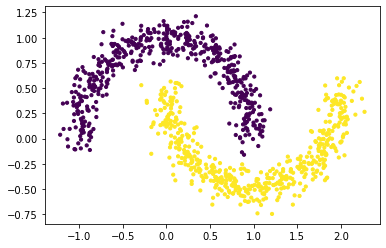

In [2]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

In [3]:
X -= X.min()
X /= X.max()

In [4]:
X.min(), X.max()

(0.0, 1.0)

In [5]:
np.unique(y)

array([0, 1])

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X = X.T

y = y.reshape(1, -1)

In [8]:
X.shape, y.shape

((2, 1000), (1, 1000))

In [11]:
model = NeuralNetwork(X, y)
model.train()

ValueError: shapes (4,1000) and (1,4) not aligned: 1000 (dim 1) != 1 (dim 0)